In [1]:
#!pip install jupyternotify
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [2]:
import os
import numpy as np
import pandas as pd
from pprint import pprint

import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
path = "train_dataset\\train\\bart\\"

dataset = os.listdir(path)

dataset.sort()

len(dataset)
pprint(dataset)

['pic_0000.jpg',
 'pic_0001.jpg',
 'pic_0002.jpg',
 'pic_0003.jpg',
 'pic_0004.jpg',
 'pic_0005.jpg',
 'pic_0006.jpg',
 'pic_0007.jpg',
 'pic_0008.jpg',
 'pic_0009.jpg',
 'pic_0010.jpg',
 'pic_0011.jpg',
 'pic_0012.jpg',
 'pic_0013.jpg',
 'pic_0014.jpg',
 'pic_0015.jpg',
 'pic_0016.jpg',
 'pic_0017.jpg',
 'pic_0018.jpg',
 'pic_0019.jpg',
 'pic_0020.jpg',
 'pic_0021.jpg',
 'pic_0022.jpg',
 'pic_0023.jpg',
 'pic_0024.jpg',
 'pic_0025.jpg',
 'pic_0026.jpg',
 'pic_0027.jpg',
 'pic_0028.jpg',
 'pic_0029.jpg',
 'pic_0030.jpg',
 'pic_0031.jpg',
 'pic_0032.jpg',
 'pic_0033.jpg',
 'pic_0034.jpg',
 'pic_0035.jpg',
 'pic_0036.jpg',
 'pic_0037.jpg',
 'pic_0038.jpg',
 'pic_0039.jpg',
 'pic_0040.jpg',
 'pic_0041.jpg',
 'pic_0042.jpg',
 'pic_0043.jpg',
 'pic_0044.jpg',
 'pic_0045.jpg',
 'pic_0046.jpg',
 'pic_0047.jpg',
 'pic_0048.jpg',
 'pic_0049.jpg',
 'pic_0050.jpg',
 'pic_0051.jpg',
 'pic_0052.jpg',
 'pic_0053.jpg',
 'pic_0054.jpg',
 'pic_0055.jpg',
 'pic_0056.jpg',
 'pic_0057.jpg',
 'pic_0058.jpg

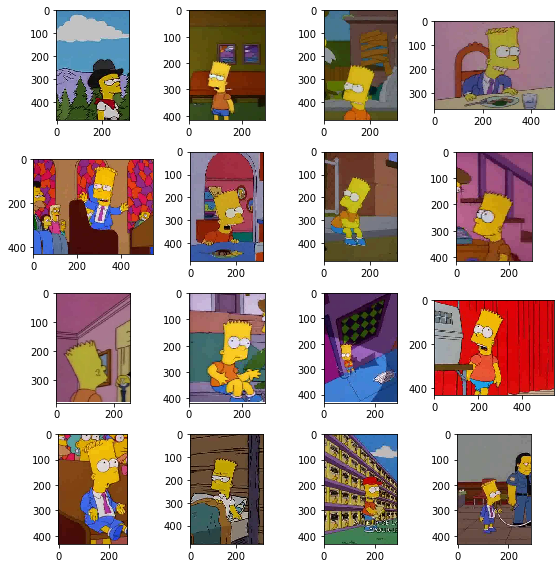

In [4]:
fig = plt.figure(figsize=(8, 8))

for i in range(16):

    plt.subplot(4, 4, 1 + i)
    plt.tight_layout()

    image_bgr = cv2.imread(path + "{}".format(dataset[i]))
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    plt.imshow(image_rgb, cmap="rainbow", interpolation="none")
    #target = np.where(example_target[i]==1)[0]
    #plt.title("Ground Truth: {}".format(category.get(int(target))))

plt.show()

In [5]:
for i in range(5):
  image_bgr = cv2.imread(path + "{}".format(dataset[i]))
  image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
  print(image_rgb.shape)

(480, 320, 3)
(416, 288, 3)
(480, 320, 3)
(368, 496, 3)
(432, 544, 3)


## Dataframe으로 정리

In [6]:
top_path = "train_dataset\\train\\"
path_list = []
category_list = []
categories = ["bart", "charles_montgomery", "krusty", "lisa_simpson", "marge_simpson", "milhouse_van_houten", "moe_szyslak", "ned_flanders", "principal_skinner"]

for category in categories:
  path = top_path+category+"\\"
  dataset = os.listdir(path)
  
  for data in dataset:
    path_list.append(path + "{}".format(data))
    category_list.append(category)


df = pd.DataFrame({"path": path_list, "category": category_list})

print(df.shape)
print(df["category"].unique())
df.value_counts("category")

(11248, 2)
['bart' 'charles_montgomery' 'krusty' 'lisa_simpson' 'marge_simpson'
 'milhouse_van_houten' 'moe_szyslak' 'ned_flanders' 'principal_skinner']


category
ned_flanders           1454
moe_szyslak            1452
lisa_simpson           1354
marge_simpson          1311
bart                   1218
principal_skinner      1193
krusty                 1101
charles_montgomery     1086
milhouse_van_houten    1079
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11248 entries, 0 to 11247
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   path      11248 non-null  object
 1   category  11248 non-null  object
dtypes: object(2)
memory usage: 175.9+ KB


In [8]:
df

,path,category
0,train_dataset\train\bart\pic_0000.jpg,bart
1,train_dataset\train\bart\pic_0001.jpg,bart
2,train_dataset\train\bart\pic_0002.jpg,bart
3,train_dataset\train\bart\pic_0003.jpg,bart
4,train_dataset\train\bart\pic_0004.jpg,bart
...,...,...
11243,train_dataset\train\principal_skinner\pic_1190...,principal_skinner
11244,train_dataset\train\principal_skinner\pic_1191...,principal_skinner
11245,train_dataset\train\principal_skinner\pic_1192...,principal_skinner
11246,train_dataset\train\principal_skinner\pic_1193...,principal_skinner


# Data Loader + Preprocessing

In [9]:
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

In [10]:
#!/usr/bin/env python3
#!pip install einops
#!pip install tensorflow --user

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os

from tensorflow.data import Dataset
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50V2, DenseNet121, EfficientNetB0, ResNet101V2

from einops import rearrange
from sklearn.model_selection import train_test_split

In [11]:
from tensorflow.keras.utils import to_categorical, Sequence

class DataGenerator(Sequence):
    def __init__(self, list_IDs, labels, 
    batch_size, img_size, img_channel, num_classes, augmentations, shuffle=False):
     
        # 데이터 이미지 개별 주소 [ DataFrame 형식 (image 주소, image 클래스) ]
        self.list_IDs = list_IDs
        # 데이터 라벨 리스트 [ DataFrame 형식 (image 주소, image 클래스) ]
        self.labels = labels
        # 학습 Batch 사이즈
        self.batch_size = batch_size
        # 이미지 리사이징 사이즈
        self.img_size = img_size
        # 이미지 채널 [RGB or Gray]
        self.img_channel = img_channel
        # 데이터 라벨의 클래스 수
        self.num_classes = num_classes
        # 전체 데이터 수
        self.indexes = np.arange(len(self.list_IDs))
        self.shuffle=shuffle
        self.on_epoch_end()
        self.augment = augmentations
   
    def __len__(self):
        len_ = int(len(self.list_IDs)/self.batch_size)
        if len_*self.batch_size < len(self.list_IDs):
            len_ += 1
        return len_
    
    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        X, y = self.__data_generation__(list_IDs_temp, index)
        
        return np.stack([
            self.augment(image=x)["image"] for x in X
        ], axis=0), y#to_categorical(y, num_classes=self.num_classes)
        #return X, y
            
    def __data_generation__(self, list_IDs_temp, index):
        X = np.zeros((self.batch_size, self.img_size, self.img_size, self.img_channel), dtype='uint8')
        y = np.zeros((self.batch_size, self.num_classes), dtype=int)
        for i, ID in enumerate(list_IDs_temp):
            img = cv2.imread(ID)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (self.img_size, self.img_size))
            X[i, ] = img 
            y[i, ] = to_categorical(self.labels[index*self.batch_size+i], num_classes=self.num_classes)
        return X, y
    
    def on_epoch_end(self):
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

In [21]:
import albumentations as A

AUGMENTATIONS_TRAIN = A.Compose([
    A.CLAHE(p=1.0, clip_limit=2.0),
    #A.ToFloat(max_value=255),
    A.Normalize(mean=(0, 0, 0), std=(1, 1, 1)),
    A.HorizontalFlip(p=0.5),
    #A.RandomContrast(limit=0.2, p=0.5),
    #A.RandomGamma(gamma_limit=(80, 120), p=0.5),
    #A.RandomBrightness(limit=0.2, p=0.5),
    #A.HueSaturationValue(hue_shift_limit=5, sat_shift_limit=20,
                       #val_shift_limit=10, p=.9),
    
    #A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, brightness_by_max=True, p=0.5),
    A.ShiftScaleRotate(
        shift_limit=0.0625, scale_limit=0.1, 
        rotate_limit=15, border_mode=cv2.BORDER_REFLECT_101, p=0.8)
])
AUGMENTATIONS_TEST = A.Compose([
    # CLAHE(p=1.0, clip_limit=2.0),
    #A.ToFloat(max_value=255),
    A.Normalize(mean=(0, 0, 0), std=(1, 1, 1))
])

In [22]:
# 전체 클래스 수
clss_num = len(df['category'].unique())
# 클래스 -> 숫자로 변환 (카테고리 형식의 클래스를 원 핫 인코딩)
labels_dict = dict(zip(df['category'].unique(), range(clss_num)))
df = df.replace({"category": labels_dict})

data = df['path']
target = df['category']


x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target)
x_train.reset_index(drop=True, inplace=True), x_valid.reset_index(drop=True, inplace=True), y_train.reset_index(drop=True, inplace=True), y_valid.reset_index(drop=True, inplace=True)


(None, None, None, None)

In [23]:
x_train, y_train

(0       train_dataset\train\principal_skinner\pic_0105...
 1            train_dataset\train\moe_szyslak\pic_0737.jpg
 2       train_dataset\train\milhouse_van_houten\pic_06...
 3       train_dataset\train\charles_montgomery\pic_067...
 4       train_dataset\train\milhouse_van_houten\pic_08...
                               ...                        
 8993    train_dataset\train\charles_montgomery\pic_070...
 8994    train_dataset\train\charles_montgomery\pic_042...
 8995         train_dataset\train\moe_szyslak\pic_0867.jpg
 8996        train_dataset\train\lisa_simpson\pic_0148.jpg
 8997    train_dataset\train\principal_skinner\pic_0804...
 Name: path, Length: 8998, dtype: object,
 0       8
 1       6
 2       5
 3       1
 4       5
        ..
 8993    1
 8994    1
 8995    6
 8996    3
 8997    8
 Name: category, Length: 8998, dtype: int64)

In [24]:
target_size = 224
img_ch = 3
num_class = 9
batch_size = 32

train_generator = DataGenerator(x_train,
                                y_train,
                                batch_size, target_size, 
                                img_ch, num_class, AUGMENTATIONS_TRAIN)
valid_generator = DataGenerator(x_valid, 
                                y_valid,
                                batch_size, target_size,
                                img_ch, num_class, AUGMENTATIONS_TEST)

In [25]:
x_train.shape

(8998,)

Target: (32, 9)
Data  : (32, 224, 224, 3)
[0 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0]
[1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 1 0 0]
[0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 1 0 0]


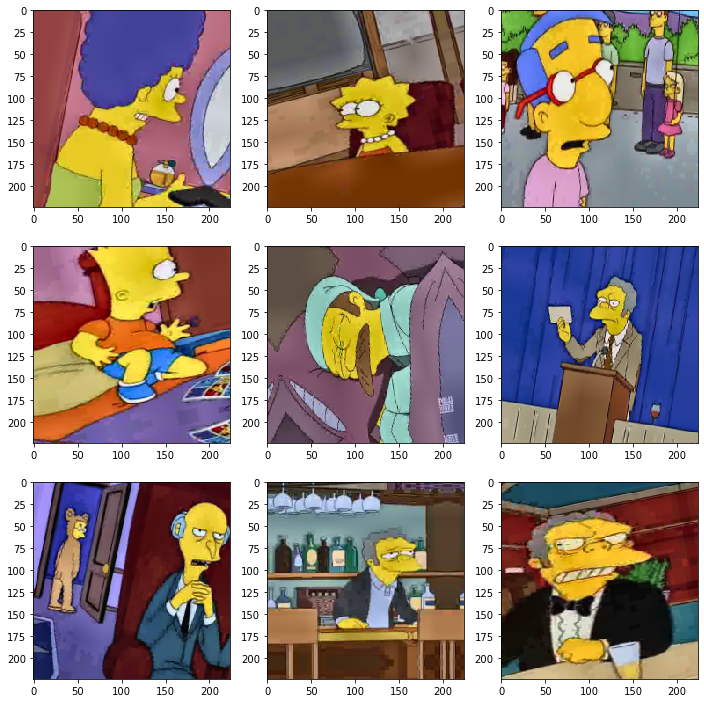

In [26]:
examples = enumerate(train_generator)
next(examples)
next(examples)
next(examples)
batch_idx, (example_data, example_target) = next(examples)

print("Target: {}".format(example_target.shape))
print("Data  : {}".format(example_data.shape))
fig = plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, 1 + i)
    plt.tight_layout()
    plt.imshow(tf.squeeze(example_data[i]), cmap="rainbow", interpolation="none")
    target = np.where(example_target[i]==1)[0]
    #plt.title("Ground Truth: {}".format(category.get(int(target))))
    print(example_target[i])
plt.show()

## 모델 구현

### 일반 모델

### 전이 학습 모델 (Resnet)

In [27]:

base_model = ResNet50V2(#input_tensor=inputs,
                         weights="imagenet", 
                         input_shape=(224, 224, 3), 
                         include_top=False)

inputs = Input(shape=(224,224,3))
base_model.trainable = False
#base_model.summary()


X = base_model(inputs, training = False)
X = GlobalAveragePooling2D()(X)
X = Dense(128, activation="swish")(X)
X = BatchNormalization()(X)
X = Dropout(0.5)(X)
outputs = Dense(9, activation="Softmax")(X)

model = Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               262272    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 1161

In [28]:
%%notify
def scheduler(epoch, lr):
  if epoch < 8:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

checkpoint_filepath = 'best_model.h5'


callback = [
            tf.keras.callbacks.LearningRateScheduler(scheduler),
            tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8),
            tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                               monitor="val_loss", 
                                               mode="min",
                                               save_best_only=True)
]

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_generator, epochs=30, callbacks = callback, validation_data=valid_generator, verbose=1)
#model.load_weights(checkpoint_filepath)

Epoch 1/30
282/282 [==============================] - 51s 167ms/step - loss: 1.4459 - accuracy: 0.5462 - val_loss: 0.8037 - val_accuracy: 0.7504


C:\Users\paulh\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
282/282 [==============================] - 47s 166ms/step - loss: 0.9372 - accuracy: 0.6906 - val_loss: 0.7137 - val_accuracy: 0.7645
Epoch 3/30
282/282 [==============================] - 47s 165ms/step - loss: 0.7745 - accuracy: 0.7500 - val_loss: 0.6766 - val_accuracy: 0.7672
Epoch 4/30
282/282 [==============================] - 46s 165ms/step - loss: 0.6932 - accuracy: 0.7706 - val_loss: 0.6691 - val_accuracy: 0.7764
Epoch 5/30
282/282 [==============================] - 47s 167ms/step - loss: 0.6659 - accuracy: 0.7794 - val_loss: 0.5948 - val_accuracy: 0.8063
Epoch 6/30
282/282 [==============================] - 46s 165ms/step - loss: 0.6147 - accuracy: 0.7888 - val_loss: 0.5722 - val_accuracy: 0.8160
Epoch 7/30
282/282 [==============================] - 46s 165ms/step - loss: 0.6019 - accuracy: 0.7959 - val_loss: 0.5784 - val_accuracy: 0.8033
Epoch 8/30
282/282 [==============================] - 48s 168ms/step - loss: 0.5609 - accuracy: 0.8030 - val_loss: 0.5772 - val_ac

<IPython.core.display.Javascript object>

In [32]:
del callback[0]
callback

In [33]:
base_model.trainable = True

model.compile(optimizer=Adam(1e-5), loss="categorical_crossentropy", metrics=["accuracy"])
history2 = model.fit(train_generator, epochs=15, callbacks = callback, validation_data=valid_generator, verbose=1)

Epoch 1/15
282/282 [==============================] - 76s 244ms/step - loss: 0.2312 - accuracy: 0.9207 - val_loss: 0.2567 - val_accuracy: 0.9190loss: 0.2359 - accura - ETA: 6s - loss: 0.236 - E
Epoch 2/15
282/282 [==============================] - 60s 214ms/step - loss: 0.1515 - accuracy: 0.9512 - val_loss: 0.2189 - val_accuracy: 0.9269- ETA: 27s - loss: 0.
Epoch 3/15
282/282 [==============================] - 61s 215ms/step - loss: 0.1113 - accuracy: 0.9643 - val_loss: 0.1898 - val_accuracy: 0.9340
Epoch 4/15
282/282 [==============================] - 60s 213ms/step - loss: 0.0876 - accuracy: 0.9715 - val_loss: 0.1916 - val_accuracy: 0.937527s - loss: 0.0933 -  - ETA: 24s - loss: 0.0897 - ac - ETA
Epoch 5/15
282/282 [==============================] - 64s 226ms/step - loss: 0.0722 - accuracy: 0.9761 - val_loss: 0.1641 - val_accuracy: 0.9476 0.0687 - accuracy: 0. - ETA: 37s - loss: 0. - ETA: 33s - loss: 0.0752 - a - ETA: 30s - loss: 0.0745 - accuracy: 0.97 - ETA: 30s - loss: 0 - ETA: 26

In [ ]:
#model.evaluate(X_test, y_test, batch_size=256)
model.predict(X_test)

In [34]:
def acc_loss_plot(hist):
    
    fit, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    
    loss_ax.plot(hist.history["loss"], "y", label="train_loss")
    loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
    loss_ax.set_xlabel("Epoch")
    loss_ax.set_ylabel("Loss")
    loss_ax.legend(loc = "upper left")
    
    acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
    acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
    acc_ax.set_ylabel("Accuracy")
    acc_ax.legend(loc = "upper right")
    
    plt.show()

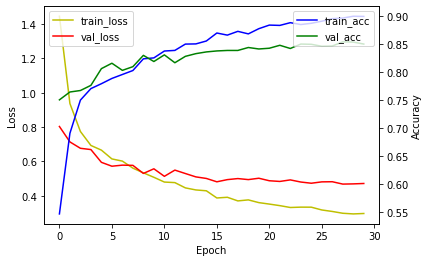

In [35]:
acc_loss_plot(history)

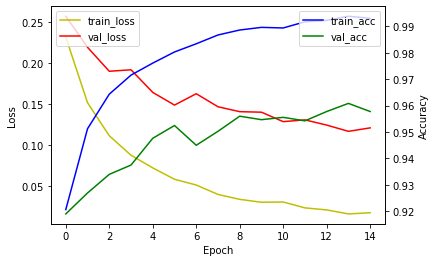

In [36]:
acc_loss_plot(history2)